In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model 

In [90]:
df = pd.read_csv("NAS.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.groupby(['Date']).mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-10-12,0.709000,0.710000,0.650000,0.676800,0.676800,48320475.0
2020-10-13,0.676800,0.676800,0.600000,0.600600,0.600600,47786200.0
2020-10-14,0.601000,0.640000,0.596200,0.626000,0.626000,37534949.0


In [91]:
new_df = df.groupby(['Date']).mean()
new_df


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-10-12,0.709000,0.710000,0.650000,0.676800,0.676800,48320475.0
2020-10-13,0.676800,0.676800,0.600000,0.600600,0.600600,47786200.0
2020-10-14,0.601000,0.640000,0.596200,0.626000,0.626000,37534949.0


In [92]:
new_df.dropna(how = 'any')
new_df = new_df.dropna(how = 'any')

In [93]:
new_df.shape

(4218, 6)

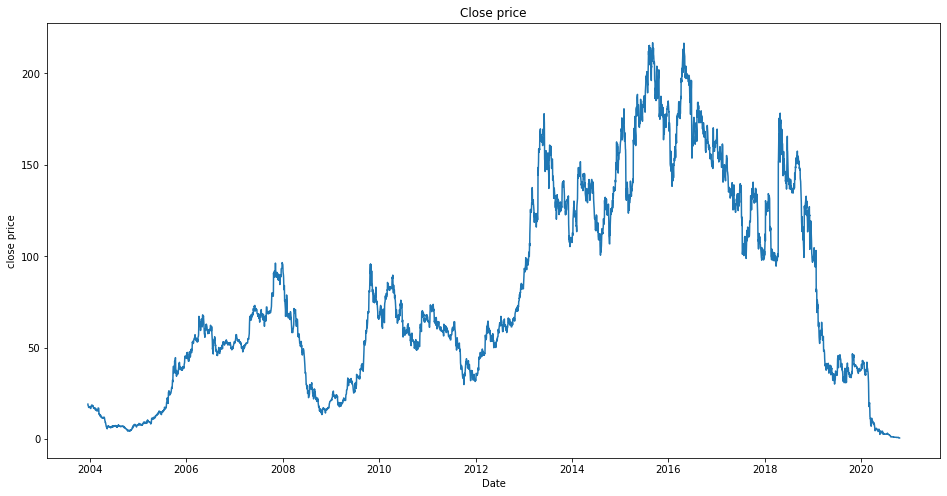

In [94]:
plt.figure(figsize=(16,8))
plt.title('Close price')
plt.plot(new_df['Close'])
plt.ylabel('close price')
plt.xlabel('Date')
plt.show()


In [105]:
close = new_df.Close
year = df["Date"].dt.year

In [107]:
regObj = linear_model.LinearRegression()
regObj.fit(year, close)

ValueError: Expected 2D array, got 1D array instead:
array=[2003 2003 2003 ... 2020 2020 2020].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

AttributeError: 'DataFrame' object has no attribute 'year'

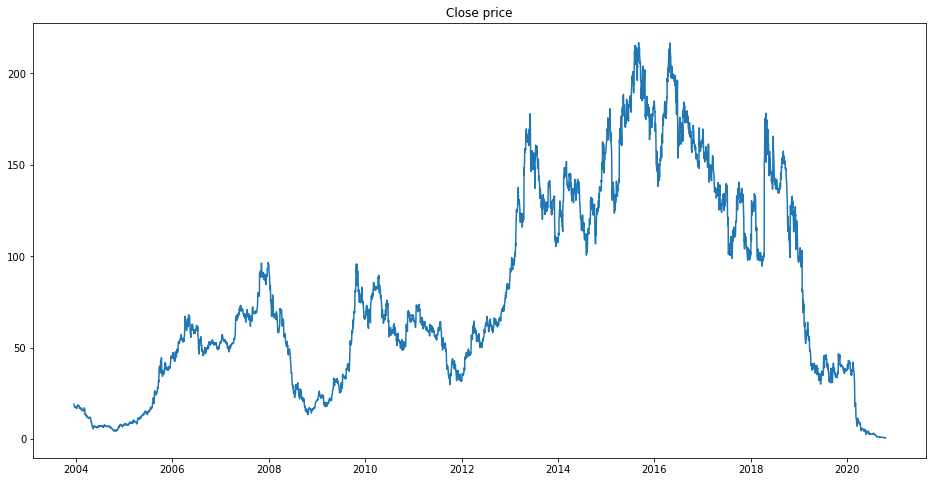

In [109]:
plt.figure(figsize=(16,8))
plt.title('Close price')
plt.plot(new_df['Close'])
plt.plot(new_df.year, regObj.predict(new_df[['year']]),color='red')
plt.ylabel('close price')
plt.xlabel('Date')
plt.show()
